In [1]:
!pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
from sklearn.ensemble import IsolationForest

In [10]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [11]:
import seaborn as sns

In [13]:
df = pd.read_csv('records.csv')

In [14]:
print(df.head())

   id  reading      reading_time  Fuel Volume (L)
0   1    23.02  11/20/2025 17:17            12.63
1   2    23.22  11/20/2025 17:17            12.46
2   3    23.22  11/20/2025 17:18            12.46
3   4    23.22  11/20/2025 17:18            12.46
4   5    23.22  11/20/2025 17:18            12.46


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               899 non-null    int64  
 1   reading          897 non-null    float64
 2   reading_time     899 non-null    object 
 3   Fuel Volume (L)  896 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.2+ KB
None


In [16]:
print(df.describe())

               id     reading  Fuel Volume (L)
count  899.000000  897.000000       896.000000
mean   450.000000   28.301126         8.109275
std    259.663243    3.547058         3.035831
min      1.000000   22.860000         0.000000
25%    225.500000   25.380000         7.720000
50%    450.000000   28.760000         7.720000
75%    674.500000   28.760000        10.610000
max    899.000000   37.780000        12.780000


In [17]:
print(df.isnull().sum())

id                 0
reading            2
reading_time       0
Fuel Volume (L)    3
dtype: int64


In [19]:
df['reading_time'] = pd.to_datetime(df['reading_time'])

In [20]:
df = df.sort_values('reading_time')

In [21]:
df.dropna(subset=['Fuel Volume (L)', 'reading', 'reading_time'], inplace=True)

In [22]:
df['reading_time'] = pd.to_datetime(df['reading_time'])

In [23]:
df = df.sort_values('reading_time')

In [24]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

In [35]:
import matplotlib.dates as mdates

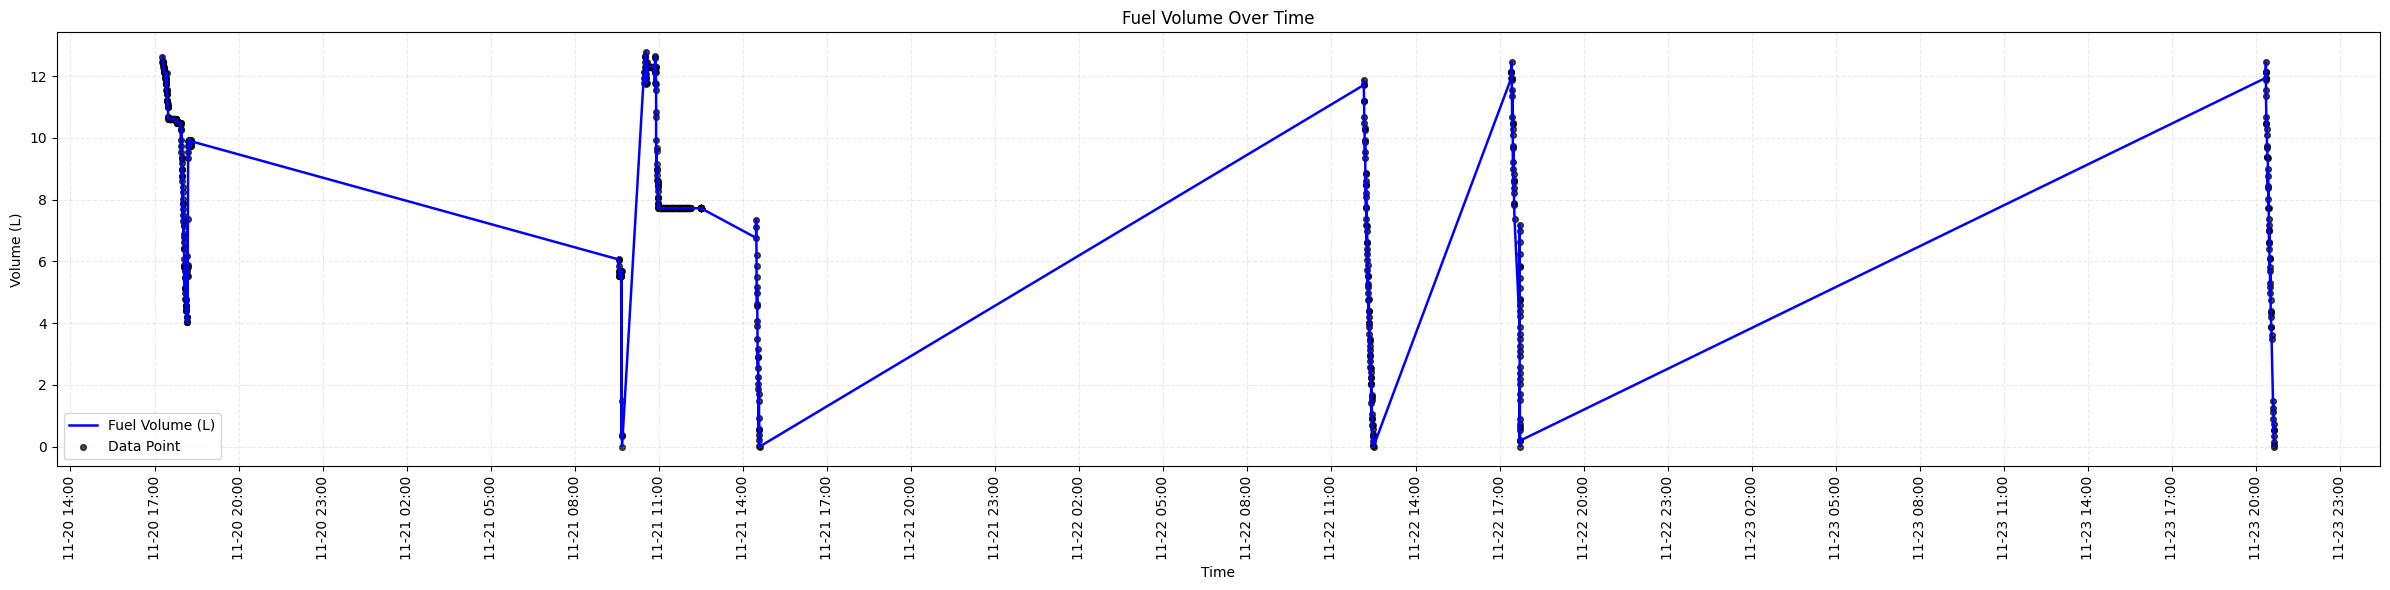

In [39]:
plt.figure(figsize=(24, 6))  # Wider for dense time axis

# Scatter and line for clarity
plt.plot(df['reading_time'], df['Fuel Volume (L)'], color='blue', label='Fuel Volume (L)', linewidth=1.8)
plt.scatter(df['reading_time'], df['Fuel Volume (L)'], color='black', s=17, label='Data Point', alpha=0.7)

plt.title('Fuel Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume (L)')
plt.legend()

# Major ticks every 3 hours, show hour+minute+date
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()